<a href="https://colab.research.google.com/github/MelihKlc/Machine-Learning/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y) , 1) #y yi 2D array yaptık feature scaling uygularken standart scale classımızın inputu 2d array olmak zorunda çünkü.
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()   #sc_X ve sc_y dedik çünkü x ve y için aynı scalerı kullanamayız ikisinin mean ve standart deviation u farklı aynı kullandığımızda x e fit ediyoruz ve standart scalerın mean ve standart deviationu x inkiler oluyor yani y ye aynılarını kullanamayız çünkü y ninkiler farklı.

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #burda radial base function kernel ini kullandığımız için parametreyi böyle girdik.
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))  #When you apply .reshape(-1,1) to an array, it will transform the array into a column vector. The resulting array will have one column and the number of rows will be calculated automatically to match the original total number of elements. This is useful when you want to convert a 1-dimensional array or a flattened array into a column vector.

array([[170370.0204065]])

## Visualising the SVR results

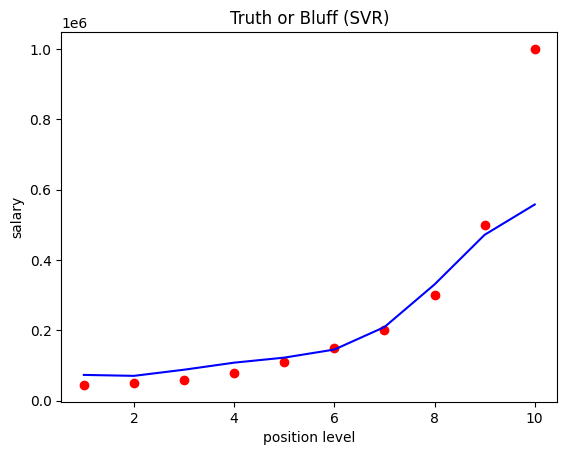

In [ ]:
plt.scatter( sc_X.inverse_transform(X) , sc_y.inverse_transform(y) , color = 'red')
plt.plot(sc_X.inverse_transform(X) , sc_y.inverse_transform(regressor.predict(X).reshape(-1,1))  , color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)